In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

#85 percent train 15 percent test

In [12]:
df = pd.read_csv('variable_selected_county_dataset.csv', index_col=0)

In [4]:
df.entity.unique()

array(['California-Los Angeles', 'California-Orange',
       'California-San Diego', 'Florida-Miami-Dade', 'Illinois-Cook',
       'Nevada-Clark', 'New York-Nassau', 'New York-New York City',
       'New York-Suffolk', 'Pennsylvania-Philadelphia', 'Texas-Harris',
       'Texas-Tarrant'], dtype=object)

In [8]:
df.isna().sum()

Unnamed: 0                      0
date                            0
cases                           0
stay_at_home_announced          0
stay_at_home_effective          0
                               ..
dewpoint_3d_avg                57
date_stay_at_home_announced     0
date_stay_at_home_effective     0
entity                          0
incremental_cases               0
Length: 135, dtype: int64

<AxesSubplot:xlabel='date'>

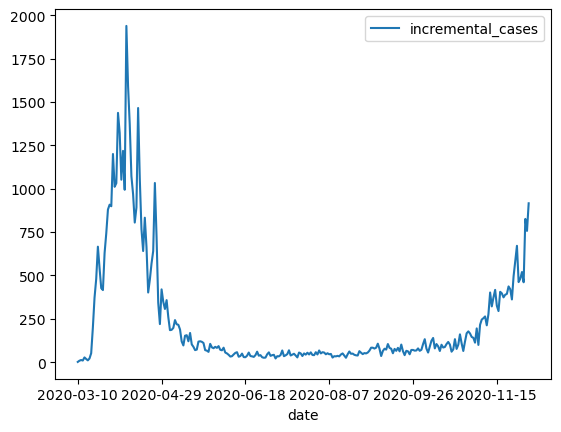

In [62]:
# get selected counties
miami = df[df.entity == 'New York-Nassau']
miami.reset_index(inplace=True)
miami.plot(x='date', y='incremental_cases')


In [63]:
arimaModel = miami[['date', 'incremental_cases']]
arimaModel

,date,incremental_cases
0,2020-03-10,2.0
1,2020-03-11,9.0
2,2020-03-12,13.0
3,2020-03-13,10.0
4,2020-03-14,28.0
...,...,...
265,2020-11-30,520.0
266,2020-12-01,461.0
267,2020-12-02,826.0
268,2020-12-03,757.0


In [55]:
train

,date,incremental_cases
3429,2020-03-10,1.0
204,2020-03-11,0.0
216,2020-03-12,1.0
228,2020-03-13,6.0
240,2020-03-14,0.0
...,...,...
2892,2020-10-21,358.0
2904,2020-10-22,853.0
2916,2020-10-23,520.0
2928,2020-10-24,616.0


In [71]:
from matplotlib import pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error



# evaluate parameters
p_values = [3, 4, 5]
d_values = [3, 4, 5, 6]
q_values = [10, 11, 12]
vals = []
prev = 100000000000000000000000000
for p in p_values:
    for d in d_values:
        for q in q_values:
            hyperPar = (p, d, q)
            train = arimaModel.head(int(0.85*len(arimaModel))+1)
            test = arimaModel.tail(int(0.15*len(arimaModel)))
            model = ARIMA(train.incremental_cases, order=hyperPar)
            model.initialize_approximate_diffuse()
            model_fit = model.fit()
            # summary of fit model
            #print(model_fit.summary())
            # line plot of residuals
            residuals = pd.DataFrame(model_fit.resid)
            #residuals.plot()
            #plt.show()
            # density plot of residuals
            #residuals.plot(kind='kde')
            #plt.show()
            # summary stats of residuals
            #print(residuals.describe())
            forecast = model_fit.forecast(steps=40)

            predictTest = pd.DataFrame(forecast)
            predictTest.columns=['incremental_cases']
            #mseEval = predictTest.incremental_cases - test.incremental_cases
            r2 = mean_squared_error(test.incremental_cases, predictTest.incremental_cases)
            if r2 < prev:
                prev = r2
                best = hyperPar
                
            print(r2, 'for parameters', hyperPar)

print(best, prev)

C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


163386.50105756856 for parameters (3, 3, 10)


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


66566.14357475522 for parameters (3, 3, 11)


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


184521.5348750862 for parameters (3, 3, 12)


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


11826.43046068938 for parameters (3, 4, 10)


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


37311.98411504842 for parameters (3, 4, 11)


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


93365.08871570404 for parameters (3, 4, 12)


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


9756.89646507508 for parameters (3, 5, 10)


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


46871.830246095706 for parameters (3, 5, 11)


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


112725.27908954311 for parameters (3, 5, 12)


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


227036.24953273177 for parameters (3, 6, 10)
223079.99209744539 for parameters (3, 6, 11)


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


95389.43158534341 for parameters (3, 6, 12)


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


157995.31349438283 for parameters (4, 3, 10)


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


176997.9298515687 for parameters (4, 3, 11)


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


123049.15961771221 for parameters (4, 3, 12)


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


21482.08803083285 for parameters (4, 4, 10)


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


7451.98447564474 for parameters (4, 4, 11)


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


240799.177195567 for parameters (4, 4, 12)


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


7908.856033686623 for parameters (4, 5, 10)


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


85019.51066980624 for parameters (4, 5, 11)


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


218136.39442149093 for parameters (4, 5, 12)


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


12703042.274388798 for parameters (4, 6, 10)
68623.76796768353 for parameters (4, 6, 11)


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


4779963.8979770895 for parameters (4, 6, 12)


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


117558.04719449762 for parameters (5, 3, 10)


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


186804.35233571997 for parameters (5, 3, 11)


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


187602.25556612667 for parameters (5, 3, 12)


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


15965.19960866932 for parameters (5, 4, 10)


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


8143.459542208779 for parameters (5, 4, 11)


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


33929.77679349111 for parameters (5, 4, 12)


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


35757.3481589097 for parameters (5, 5, 10)


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


112185.24053886175 for parameters (5, 5, 11)


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


36995.51774046857 for parameters (5, 5, 12)


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


12190442.391258355 for parameters (5, 6, 10)


C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


389769.74792232586 for parameters (5, 6, 11)
694724.4254432451 for parameters (5, 6, 12)
(4, 4, 11) 7451.98447564474


In [80]:
r2 = r2_score(test.incremental_cases, predictTest.incremental_cases)
r2

0.8041234929262056

In [72]:
model = ARIMA(train.incremental_cases, order=(4, 4, 11))
model.initialize_approximate_diffuse()
model_fit = model.fit()
# summary of fit model
#print(model_fit.summary())
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
#residuals.plot()
#plt.show()
# density plot of residuals
#residuals.plot(kind='kde')
#plt.show()
# summary stats of residuals
#print(residuals.describe())
forecast = model_fit.forecast(steps=40)

predictTest = pd.DataFrame(forecast)
predictTest.columns=['incremental_cases']

C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\yshik\Anaconda3\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


In [57]:
test

,date,incremental_cases
230,2020-10-26,581.0
231,2020-10-27,727.0
232,2020-10-28,746.0
233,2020-10-29,673.0
234,2020-10-30,883.0
235,2020-10-31,339.0
236,2020-11-01,918.0
237,2020-11-02,948.0
238,2020-11-03,879.0
239,2020-11-04,696.0


In [74]:
foo = pd.DataFrame(model_fit.resid)
foo.columns=['incremental_cases']
predictedTrain = train.copy()
predictedTrain.incremental_cases += foo.incremental_cases
predictedTrain
#predictedTrain = train + foo
#predictedTrain

,date,incremental_cases
0,2020-03-10,4.000000
1,2020-03-11,13.558051
2,2020-03-12,5.768598
3,2020-03-13,-5.339742
4,2020-03-14,50.440229
...,...,...
225,2020-10-21,216.841438
226,2020-10-22,18.952890
227,2020-10-23,131.092360
228,2020-10-24,221.666435


<AxesSubplot:>

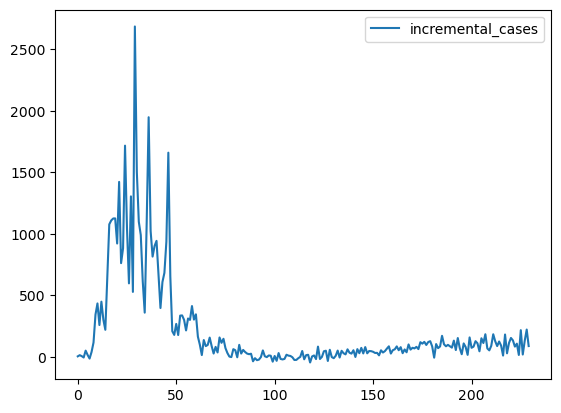

In [75]:
predictedTrain.plot(y='incremental_cases')

<AxesSubplot:>

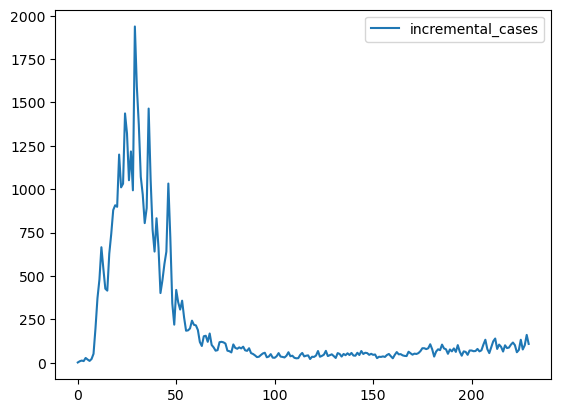

In [76]:
train.plot(y='incremental_cases')

<AxesSubplot:>

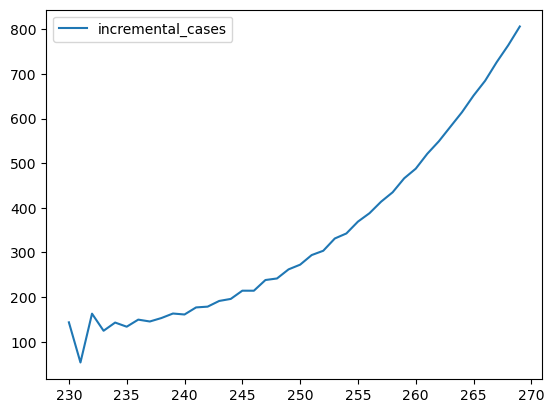

In [77]:
predictTest.plot(y='incremental_cases')

<AxesSubplot:>

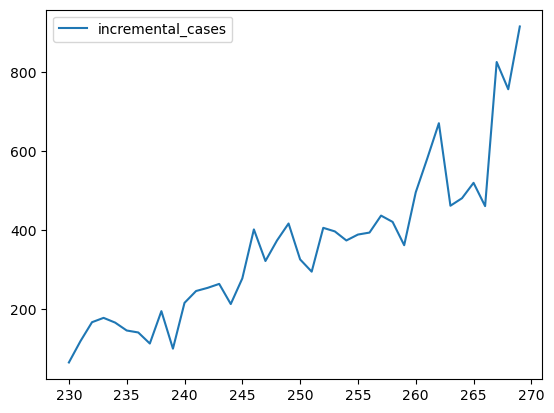

In [78]:
test.plot(y='incremental_cases')